# **<a id="Content" style="color:#023e8a;">Table of Content</a>**

* [**<span style="color:#023e8a;">1. Project Overview</span>**](#Project-Overview) 
* [**<span style="color:#023e8a;">2. Data Sources</span>**](#Data-Sources)
* [**<span style="color:#023e8a;">3. Data Import and EDA</span>**](#Data-Import)
* [**<span style="color:#023e8a;">4. EDA</span>**](#EDA)
* [**<span style="color:#023e8a;">5. Data Cleanup</span>**](#Data-Cleanup)
* [**<span style="color:#023e8a;">6. Key Questions Answered</span>**](#Questions)
* [**<span style="color:#023e8a;">7. Conclusion</span>**](#Conclusion)
* [**<span style="color:#023e8a;">8. References</span>**](#References)

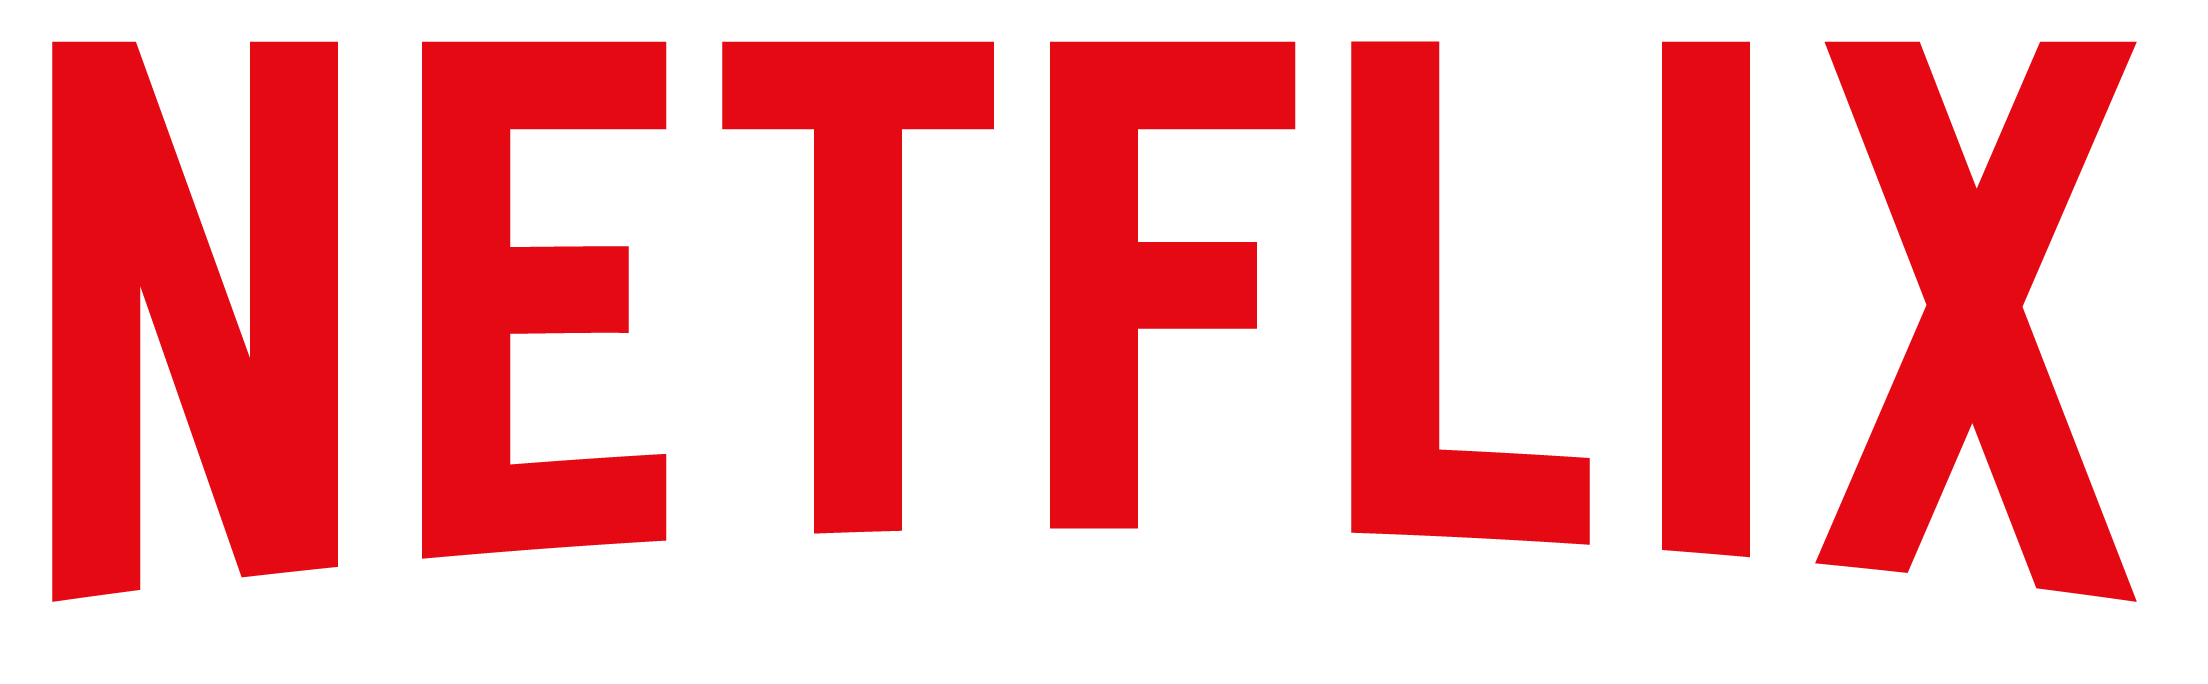

# **<span style="color:#023e8a;font-size:200%"><center>Analysis of Netflix Content Library</center></span>**

# **<span id="Project-Overview" style="color:#023e8a;">Project and Dataset Overview</span>**

**Netflix Content Analysis**

Netflix is the pioneer of internet media and entertainment streaming. Over the years it has faced several challenges and also overcome a shift in demographics, changing viewership styles and choices.

Netflix’s content library and their recommendations engine play a big role in influencing the content consumed by people worldwide. Research from Netflix shares that over 80% of the content watched on their platform came from
their recommendations engine. 

As Netflix has over 100 million users worldwide, it becomes crucial for Netflix to implement a strong data-driven algorithm to recommend customized movies and TV shows to its audience.

The following project is interested in studying the changes in Netflix’s content strategy over the years. We are curious to know if or to what extent these changes resulted from cultural and target audience changes in Netflix's subscriber base.

*   Perform Exploratory Data Analysis, Data cleanup on the dataset using Python.
*   Analyze variables in our dataset such as actors, genres, directors, ratings etc.
*  Find answers to key questions and trends around Netflix’s investment into various kinds of media content.

## Tip

Use the table-of-contents in the notebook to traverse the notebook.

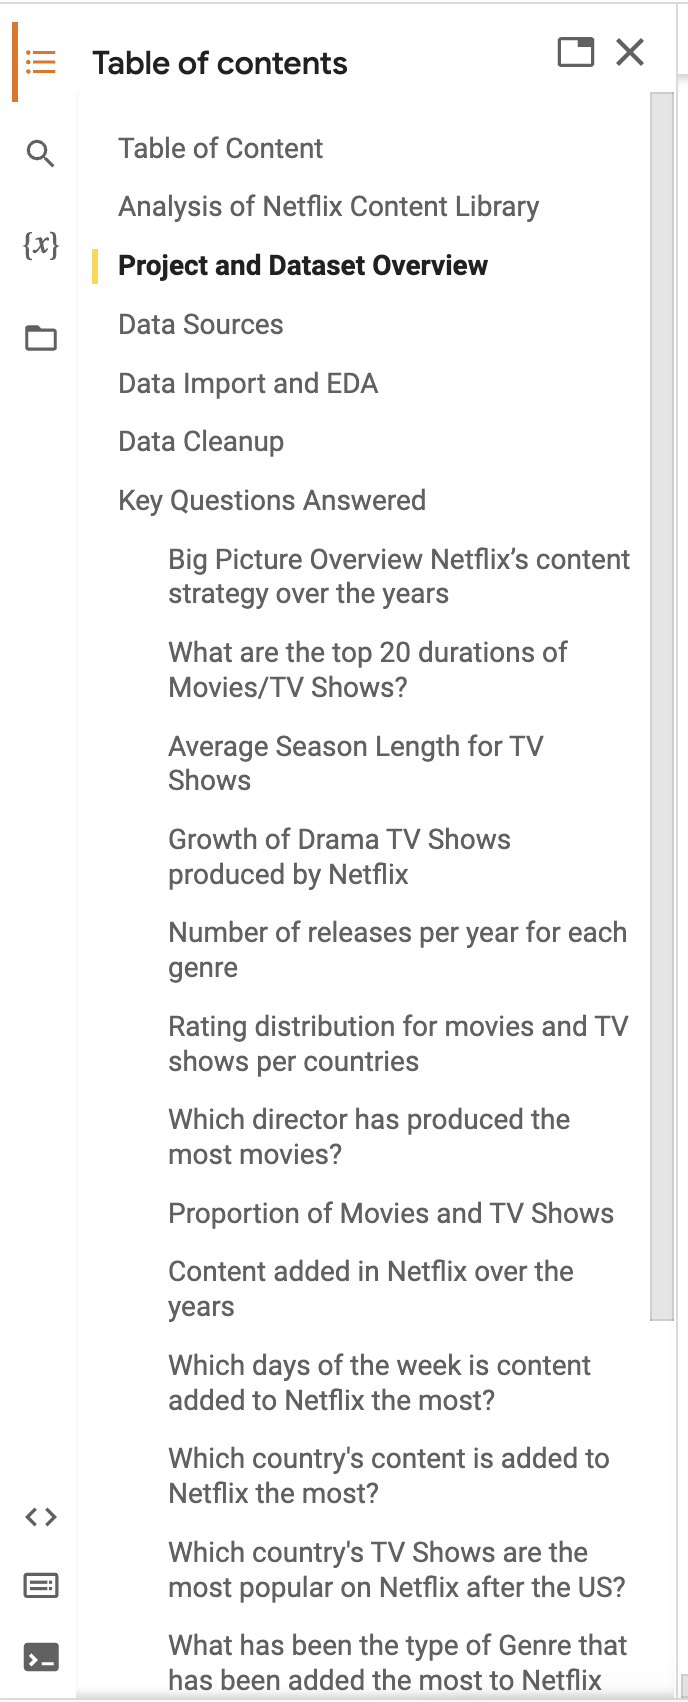

# **<span id="Data-Sources" style="color:#023e8a;">Data Sources</span>**
---

Our dataset was captured using a combination of tools and methods; scraping, API calls, and manual validation. Using these techniques, the author of the original dataset, Shivam Bansal, was able to capture information on a myriad of topics, namely on Netflix shows, movie titles, directors, casts, countries, release dates, ratings, and more. In total, our dataset has `12` columns and `8807` rows.

*   [Netflix-Shows by Shivam Bansal](https://www.kaggle.com/datasets/shivamb/netflix-shows)
*  [Clarification of Source of dataset by Author](https://twitter.com/shivamshaz/status/1452642649442172931?s=20&t=OSh8EM8VNMZhmXSi6aBgtA)

* [Scraped Data - Netflix Original Programming](https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming)

# **<span id="Data-Cleanup" style="color:#023e8a;">Data Import</span>**


In [ ]:
#Import Google Drive
from google.colab import drive
#Import OS for file management
import os
#Import Pandas for data manipulation
import pandas as pd
#Import Matplotlib for data visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('dark_background')
#Import numpy for data manipulation
import numpy as np
#Import seaborn for data visualization
import seaborn as sns
#Inline plotting
%matplotlib inline

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!cd gdrive/Shareddrives/BA780/.kaggle/

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "gdrive/Shareddrives/BA780/.kaggle/"

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! chmod 600 gdrive/Shareddrives/BA780/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 41.2MB/s]


In [ ]:
!unzip netflix-shows.zip 

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
netflix_ds = pd.read_csv('netflix_titles.csv')

# **<span id="EDA" style="color:#023e8a;">EDA</span>**

In [ ]:
#Check basic data-set rows
netflix_ds.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#Check dataset shape
netflix_ds.shape

(8807, 12)

In [ ]:
#Check Dataset info
netflix_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_ds.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# **<span id="Data-Cleanup" style="color:#023e8a;">Data Cleanup</span>**



In [ ]:
#Check Null Values per column
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_ds.dropna(inplace=True,thresh=2) #Threshold of 2 does not end up removing anything

In [ ]:
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Rating Distribution
netflix_ds["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#Rating has duration (74 mins, 84 etc. needs to be cleaned and replaced)
netflix_ds[netflix_ds["rating"].isin(["74 min","84 min","66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| Louis C.K. 2017      | TV-MA       |
| Louis C.K.: Hilarious   | TV-MA        |
| Louis C.K.: Live at the Comedy Store | TV-MA |

In [ ]:
#Replacing the ratings from NaN
netflix_ds["rating"].replace(["74 min","84 min","66 min"], "TV-MA", inplace= True)

In [ ]:
netflix_ds[netflix_ds["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| 13TH: A Conversation with Oprah Winfrey & Ava DuVernay| TV-PG |
| Gargantia on the Verdurous Planet      | TV-14       |
| Little Lunch	   | TV-MA        |
| My Honor Was Loyalty	 | PG-13 |

In [ ]:
#Find location of the Movies and Shows and replace their ratings
netflix_ds[netflix_ds["title"] == "Little Lunch"] = netflix_ds[netflix_ds["title"] == "Little Lunch"].replace(np.nan, "TV-MA")
netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"] = netflix_ds[netflix_ds["title"] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay"].replace(np.nan, "TV-PG")
netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"] = netflix_ds[netflix_ds["title"] == "Gargantia on the Verdurous Planet"].replace(np.nan, "TV-14")
netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"] = netflix_ds[netflix_ds["title"] == "My Honor Was Loyalty"].replace(np.nan, "PG-13")

In [ ]:
netflix_ds["rating"].value_counts(ascending=False)

TV-MA       3211
TV-14       2161
TV-PG        864
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2631
cast             825
country          830
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Replacing and filling in director, cast, and country 
netflix_ds.fillna({'director': 'Not Listed', 'country': 'Not Listed', 'cast': 'Not Listed'}, inplace=True)
pd.isnull(netflix_ds).sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
netflix_ds.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Unique values in each column
netflix_ds.nunique().sort_values(ascending=False)

show_id         8807
title           8807
description     8775
cast            7693
director        4532
date_added      1767
country          750
listed_in        514
duration         220
release_year      74
rating            14
type               2
dtype: int64

In [ ]:
#Convert Date Added column and Release Year to datetime
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'])
netflix_ds['release_year'] = pd.to_datetime(netflix_ds['release_year'], format='%Y')

# **<span id="Questions" style="color:#023e8a;">Key Questions Answered</span>**


# **Phase 1**

## Big Picture Overview Netflix’s content strategy over the years

In [ ]:
#installing dependency for plotly
!pip install plotly

In [ ]:
#Create plot that can be hovered over
import plotly.express as px

#set background color to black
px.defaults.template = "plotly_dark"

fig = px.scatter(netflix_ds, x="release_year", y="duration", color="rating", hover_name="title", size_max=60)

#Set title
fig.update_layout(title_text='Netflix Content Analysis')

#Set x-axis title
fig.update_xaxes(title_text='Release Year')

#Set y-axis title
fig.update_yaxes(title_text='Duration')

#Show plot
fig.show()

## What are the top 20 durations of Movies/TV Shows?

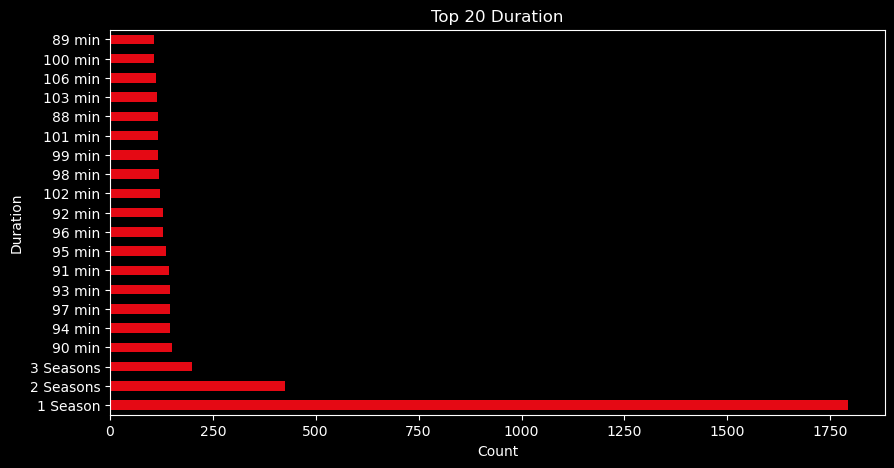

In [ ]:
#Ensuring Matplotlib style is set to dark
import matplotlib.style as style
style.use('dark_background')  

#Plot top 20 duration column color code by rating
netflix_ds['duration'].value_counts().head(20).plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Top 20 Duration')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

It could also be interesting to assess if there are any specific days on which Netflix prefers to add their content.

## Average Season Length for TV Shows

In [ ]:
#Remove NaN from duration
netflix_ds['duration'].replace('NaN', '0 min', inplace=True)

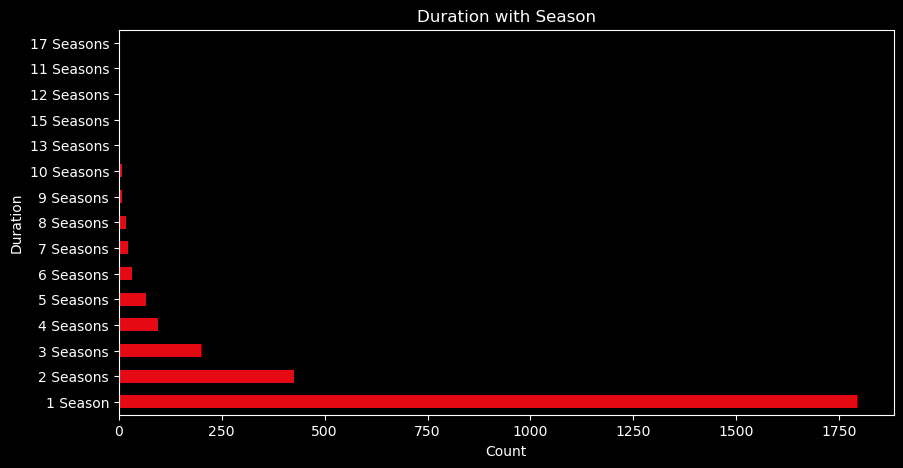

In [ ]:
#Plot value from duration column that includes the word season
netflix_ds[netflix_ds['duration'].str.contains('Season',na=False)]['duration'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Duration with Season')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

## Growth of Drama TV Shows **produced** by Netflix

Because the original dataset does not include information of Producers, we use python libraries `beautifulsoup4` , `requests` to parse information from the Wikipedia page.

In [ ]:
#Installing beautifulsoup4 for web scraping
!pip install beautifulsoup4

In [ ]:
#Importing BeautifulSoup and requests
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [ ]:
# Get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code) #200 means OK

200


In [ ]:
# Parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
netflix_originals_drama_table=soup.find('table',{'class':"wikitable"})

In [ ]:
netflix_originals_drama_ds=pd.read_html(str(netflix_originals_drama_table))
# convert list to dataframe
netflix_originals_drama_ds=pd.DataFrame(netflix_originals_drama_ds[0])
print(netflix_originals_drama_ds.head())

                     Title             Genre           Premiere  \
0           House of Cards   Political drama   February 1, 2013   
1            Hemlock Grove   Horror/thriller     April 19, 2013   
2  Orange Is the New Black      Comedy drama      July 11, 2013   
3               Marco Polo  Historical drama  December 12, 2014   
4                Bloodline          Thriller     March 20, 2015   

             Finale                 Seasons    Runtime   Notes  
0  November 2, 2018  6 seasons, 73 episodes  42–59 min     [1]  
1  October 23, 2015  3 seasons, 33 episodes  45–58 min  [2][a]  
2     July 26, 2019  7 seasons, 91 episodes  50–92 min     [3]  
3      July 1, 2016  2 seasons, 20 episodes  48–65 min     [4]  
4      May 26, 2017  3 seasons, 33 episodes  48–68 min     [5]  


In [ ]:
#Export to CSV for manual verification
netflix_originals_drama_ds.to_csv('netflix_originals_ds_drama.csv', index=False)

In [ ]:
#Drop notes column as it is not needed
netflix_originals_drama_ds.drop(['Notes'], axis=1, inplace=True)

In [ ]:
#Split Seasons Column into two columns
netflix_originals_drama_ds[['Seasons_Only','Episodes']] = netflix_originals_drama_ds['Seasons'].str.split(',',expand=True)
netflix_originals_drama_ds.head()

,Title,Genre,Premiere,Finale,Seasons,Runtime,Seasons_Only,Episodes
0,House of Cards,Political drama,"February 1, 2013","November 2, 2018","6 seasons, 73 episodes",42–59 min,6 seasons,73 episodes
1,Hemlock Grove,Horror/thriller,"April 19, 2013","October 23, 2015","3 seasons, 33 episodes",45–58 min,3 seasons,33 episodes
2,Orange Is the New Black,Comedy drama,"July 11, 2013","July 26, 2019","7 seasons, 91 episodes",50–92 min,7 seasons,91 episodes
3,Marco Polo,Historical drama,"December 12, 2014","July 1, 2016","2 seasons, 20 episodes",48–65 min,2 seasons,20 episodes
4,Bloodline,Thriller,"March 20, 2015","May 26, 2017","3 seasons, 33 episodes",48–68 min,3 seasons,33 episodes


In [ ]:
#Convert Premiere column to datetime
netflix_originals_drama_ds['Premiere'] = pd.to_datetime(netflix_originals_drama_ds['Premiere'])
#Convert Finale column to datetime
netflix_originals_drama_ds['Finale'] = pd.to_datetime(netflix_originals_drama_ds['Finale'])

In [ ]:
#Dtypes of the columns
netflix_originals_drama_ds.dtypes

Title                   object
Genre                   object
Premiere        datetime64[ns]
Finale          datetime64[ns]
Seasons                 object
Runtime                 object
Seasons_Only            object
Episodes                object
dtype: object

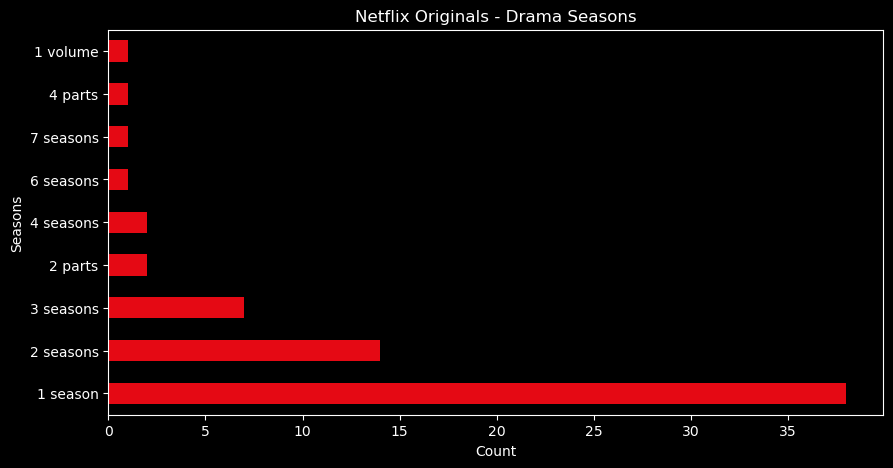

In [ ]:
#Plot Netflix Originals Drama Seasons
netflix_originals_drama_ds['Seasons_Only'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Netflix Originals - Drama Seasons')
plt.xlabel('Count')
plt.ylabel('Seasons')
plt.show()

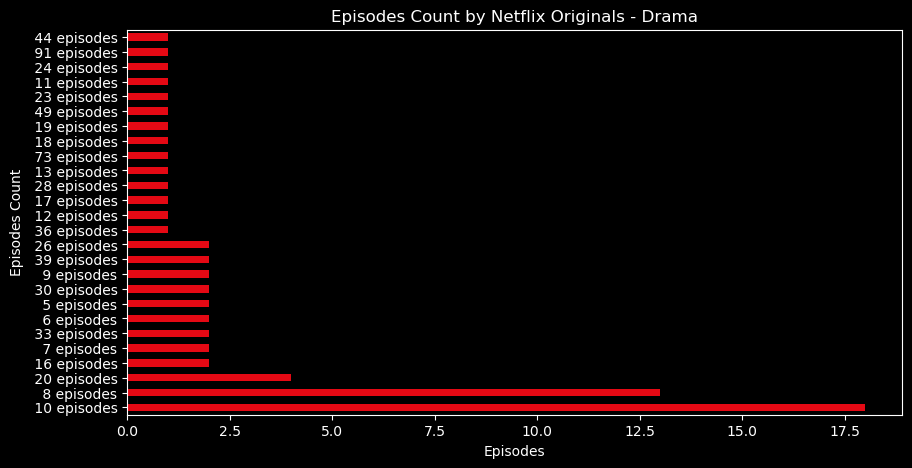

In [ ]:
#Plot Netflix Originals Drama Episodes
netflix_originals_drama_ds['Episodes'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Episodes')
plt.ylabel('Episodes Count')
plt.title('Episodes Count by Netflix Originals - Drama')
plt.show()


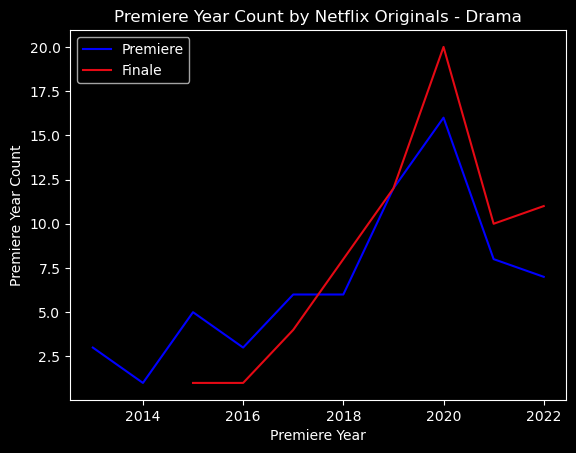

In [ ]:
#Plot time series of Premiere and Finale Year

#Color red for Premiere and Red for Finale
netflix_originals_drama_ds.groupby(netflix_originals_drama_ds['Premiere'].dt.year)['Premiere'].count().plot(color='blue', label='Premiere')
netflix_originals_drama_ds.groupby(netflix_originals_drama_ds['Finale'].dt.year)['Finale'].count().plot(color='#E50914', label='Finale')

#Show legend
plt.legend()

#Label the plot
plt.xlabel('Premiere Year')
plt.ylabel('Premiere Year Count')
plt.title('Premiere Year Count by Netflix Originals - Drama')
plt.show()

## Number of releases per year for each genre

Starting in 2016, which is the year that Netflix began its international expansion, the company produced more international movies than it did any other genre. This finding supports their strategy to appeal to customers in new markets with different preferences.

In [ ]:
netflix_ds2 = netflix_ds.listed_in.str.split(',').apply(pd.Series)
netflix_ds2.index = netflix_ds.set_index(["release_year"]).index
netflix_ds2 = netflix_ds2.stack().reset_index(["release_year"])
netflix_ds2.groupby(["release_year", 0])[0].count().sort_values(ascending=False)

## Rating distribution for movies and TV shows per countries

This question aims to explore the movie/TV show preference that differs between each country. For example, in the United States, most of Netflix's movies and TV shows fall under the category of TV-MA (Mature Audiece only), while in India, movies mostly falls under the TV-14 category.

In [ ]:
#Movie
#netflix_ds.groupby(["country", "rating"])["country"].count()

netflix_ds3 = netflix_ds.country.str.split(',').apply(pd.Series)
netflix_ds3.index = netflix_ds.set_index(['rating', 'type']).index
netflix_ds3 = netflix_ds3.stack().reset_index(['rating', 'type'])
netflix_ds3 = netflix_ds3.groupby([0, "type"])["rating"].count().sort_values(ascending=False)
#netflix_ds3[netflix_ds3["type"]== "Movie"]
#netflix_ds3.loc[movie]
#type(netflix_ds3)

## Which director has produced the most movies?

Netflix directors who have produced the most movies at the time this dataset was captured is: 

1. Rajiv Chilaka
2. Raul Campos, Jan Suter
2. Suhas Kadav
3. Marcus Raboy


In [ ]:
#Plot top 10 directors by movie and remove Not Listed
netflix_ds[(netflix_ds['type']=='Movie') & (netflix_ds['director']!='Not Listed')]['director'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling the plot 
#Remove decimal from x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Top 10 Directors by Movie')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

## Proportion of Movies and TV Shows


In [ ]:
#Plot proportion of movies and tv shows and color code by red and blue
netflix_ds['type'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%1.1f%%', colors=['#E50914', '#564d4d'])
#Label the plot
plt.title('Proportion of Movies and TV Shows')
plt.show()

## Content added in Netflix over the years

In [ ]:
#Plot content added year by year
netflix_ds['date_added'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Year')
plt.ylabel('Content Added')
plt.title('Content Added Year by Year')
plt.show()

## Which days of the week is content added to Netflix the most?


Most contents are released on Fridays, followed by Thursdays and Wednesdays. Friday has been the traditional release day for content, which reflects the norm of high likeliness of viewers to spend their leisure time watching new movies/TV shows during the weekend. 

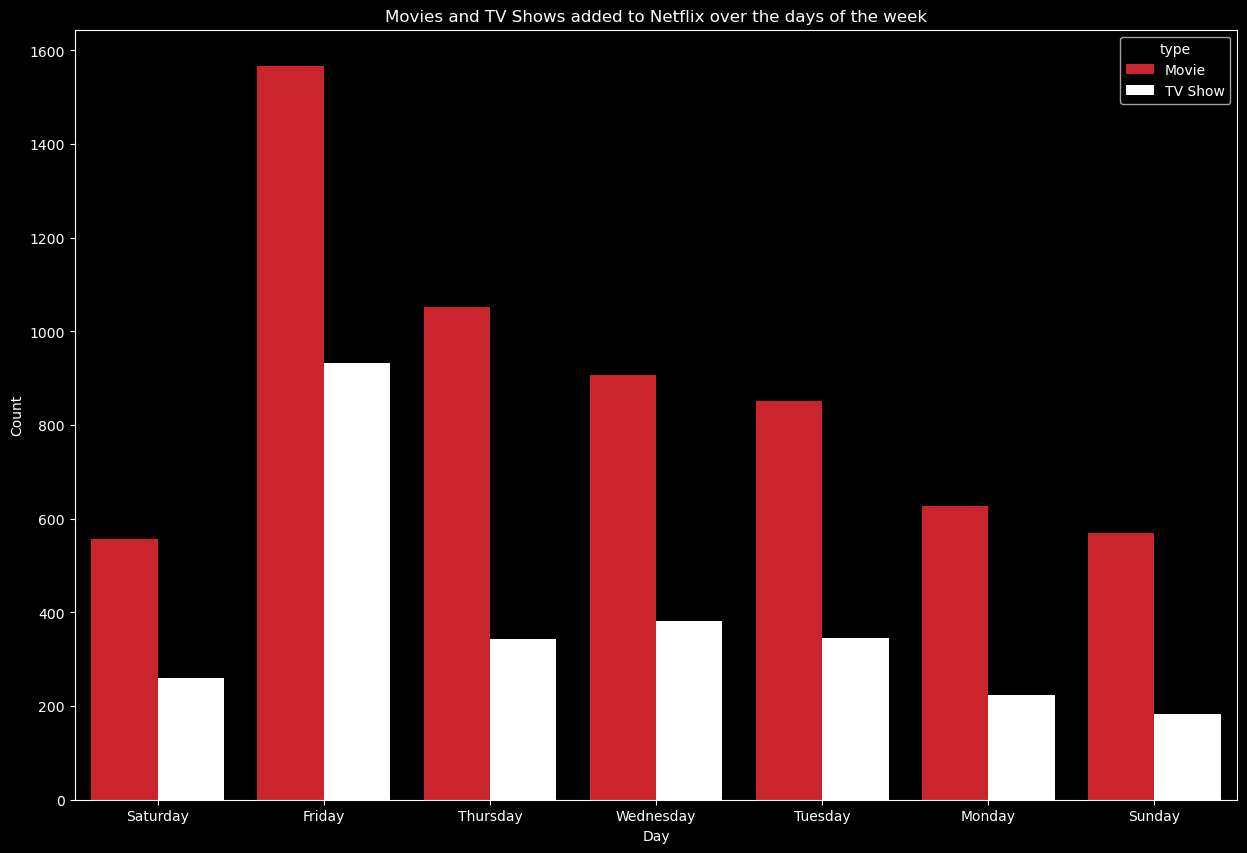

In [ ]:
#Plot and Hue by type the days of the week when content was added to Netflix
#Create a column of date added day of the week
netflix_ds['date_added_day'] = netflix_ds['date_added'].dt.day_name()
plt.figure(figsize=(15,10))
#Change color of plot to red and white
sns.countplot(x='date_added_day', hue='type', data=netflix_ds, palette=['#E50914', '#ffffff'])
plt.title('Movies and TV Shows added to Netflix over the days of the week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**Observations**

Netflix shows a heavy preference in adding content on Friday's as opposed to Sunday's, which is the least preferred day for content additions in Netflix. In our research, this tracks well with industry practice.

We found it interesting to note that Sunday's were less preferred than Monday. Based on our research, in order to provide a convenient time for viewers to binge watch Netlix's content, Netflix follows a practice to add TV shows preferably on Fridays.

Moving further into the analysis, it is worthwhile to review the Genres which Netflix favors the most.

## Which country's content is added to Netflix the most?

In [ ]:
#Plot country that has most shows and movies on Netflix after the US
netflix_ds['country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('Content Added by Country')
plt.show()

## Which country's TV Shows are the most popular on Netflix after the US?

In [ ]:
country_content = netflix_ds[(netflix_ds["type"] == "TV Show") & (netflix_ds["type"] != "Not Listed") & (netflix_ds["country"] != "Not Listed") & (netflix_ds["country"] != "United States")]
countrywise = country_content.groupby("country",as_index= False)["type"].count()
A = countrywise.sort_values("type",ascending = False).head(10)
print(A.head(10))

In [ ]:
#Plot country
A.plot(kind = "bar",x = "country",y = "type",figsize = (10,5),color = "#E50914")
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('Content Added by Country')
plt.show()

## What has been the type of Genre that has been added the most to Netflix over the years?

We chose to split the Genres before and after 2016 because of Netflix's expansion to `130` countries in 2016. 

We wanted to see if the type of content added to Netflix changed after the expansion. If so, we also wanted to see if the change in the type of content added to Netflix post the expansion in 2016, was due to the change in its target audience.

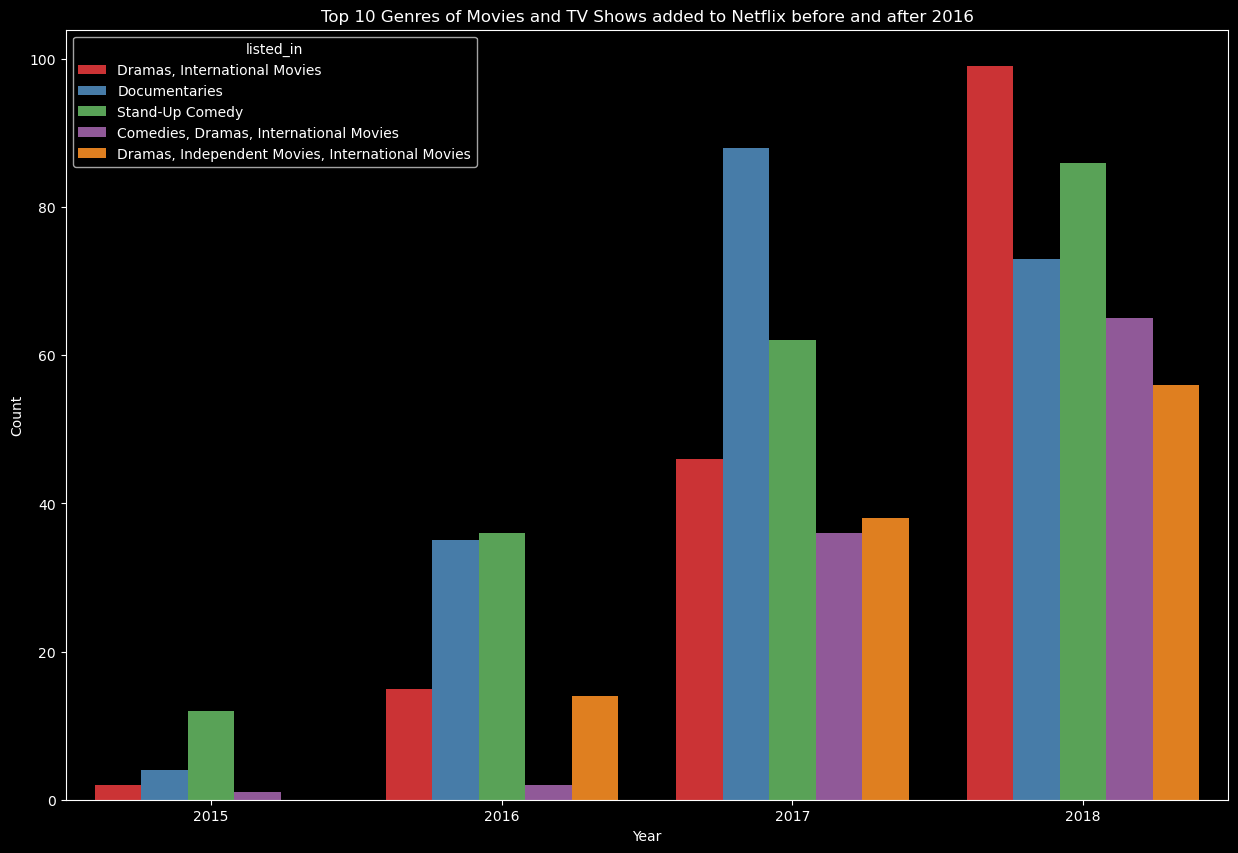

In [ ]:
#plot the top 10 genres of movies and tv shows before and after 2016
plt.figure(figsize=(15,10))
sns.countplot(x='date_added_year', hue='listed_in', data=netflix_ds, palette='Set1', order=[2015,2016,2017,2018], hue_order=netflix_ds['listed_in'].value_counts().index[:5])
plt.title('Top 10 Genres of Movies and TV Shows added to Netflix before and after 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observation**

Except for the known fact that Netflix did not provide much of the content before `2016`, we do notice the interesting increase in addition of `Documentaries`, and `Dramas, International Movies`. We suspect that this is a part of Netflix's strategy of appealing to new international audiences.

## What is the overall distrubution of Genres in the Netflix library?

In [ ]:
#Plotly tree map of Genres
fig = px.treemap(netflix_ds, path=['listed_in'], title='Top 10 Genres of Movies before 2016')
fig.update_layout(title='Highest watched Geners on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig.show()

## Wordcloud of Descriptions of Movies and TV Shows



In [ ]:
!pip install wordcloud

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
#Take URL of the image and create a mask for the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
url = "https://ik.imagekit.io/taw2awb5ntf/wp-content/uploads/2021/01/netflix-logo-1-2048x1152.png"
response = requests.get(url)
img = Image.open(urllib.request.urlopen(url))
mask = np.array(img)

def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val


In [ ]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [ ]:
description = " ".join(description for description in netflix_ds.description)

wordcloud = WordCloud(width = 3000, height = 2000, random_state=42, background_color='black', colormap='Reds', collocations=False, stopwords = STOPWORDS, mask=maskable_image).generate(description)
def plot_cloud(wordcloud):
    # Adjust the figure size
    plt.figure(figsize=(40, 30))
    # Display the word cloud
    plt.imshow(wordcloud) 
    # Remove the axis details and names
    plt.axis("off");
plot_cloud(wordcloud)
#wordcloud.to_file("netflix-wordcloud.png")

## **Proportion of Movies and TV shows** ##

In [ ]:
# Proportion of Movies and TV Shows
#import seaborn as sns
sns.countplot( x = netflix_ds['type'], palette=['#E50914',"#ffffff"])
plt.title('Proportion of Movies and TV shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

## **Customising data added column** ##

In [ ]:
#converting date_added col into datetime format

import pandas as pd
#Clean Date Added - Manual Validation 
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'], infer_datetime_format =True, errors = 'coerce')
netflix_ds

In [ ]:
#extracting year from date_added
netflix_ds['date_added1'] = netflix_ds['date_added'].dt.strftime('%Y')
netflix_ds


In [ ]:
netflix_ds['date_added1']=pd.to_numeric(netflix_ds['date_added1'],errors='ignore')
netflix_ds['date_added1'].astype("Int64")

In [ ]:
## ERROR  .....|||||||||||||||||||||||||||
import numpy as np
netflix_ds['release_year'] = np.array('release_year')
netflix_ds['date_added1'] = np.array('date_added1')
netflix_ds['year_diff'] = netflix_ds['date_added1'] - netflix_ds['release_year']
netflix_ds['year_diff']

## **Trend of content rise over the years** ##



In [ ]:
yearly_release = netflix_ds.groupby('date_added1', as_index = False)['title'].count()
a = yearly_release.sort_values('date_added1')
a

In [ ]:
# Overall content additions

import matplotlib.pyplot as plt
plt.bar(a['date_added1'], a['title'], color ='#E50914')
plt.axvline(2016, color  ="w", linestyle = ":", alpha =1)
plt.title('Netflix Yearly Content Additions')
plt.xlabel('Year Added')
plt.ylabel('No.of Content added')
plt.xlim([2010,2021])
plt.ylim([0,2200])
plt.show()

## **Bifurcation of Movie and TV Shows increase over the years** ##

In [ ]:
#Calculate only years from date_added
netflix_ds['date_added_year'] = netflix_ds['date_added'].dt.year

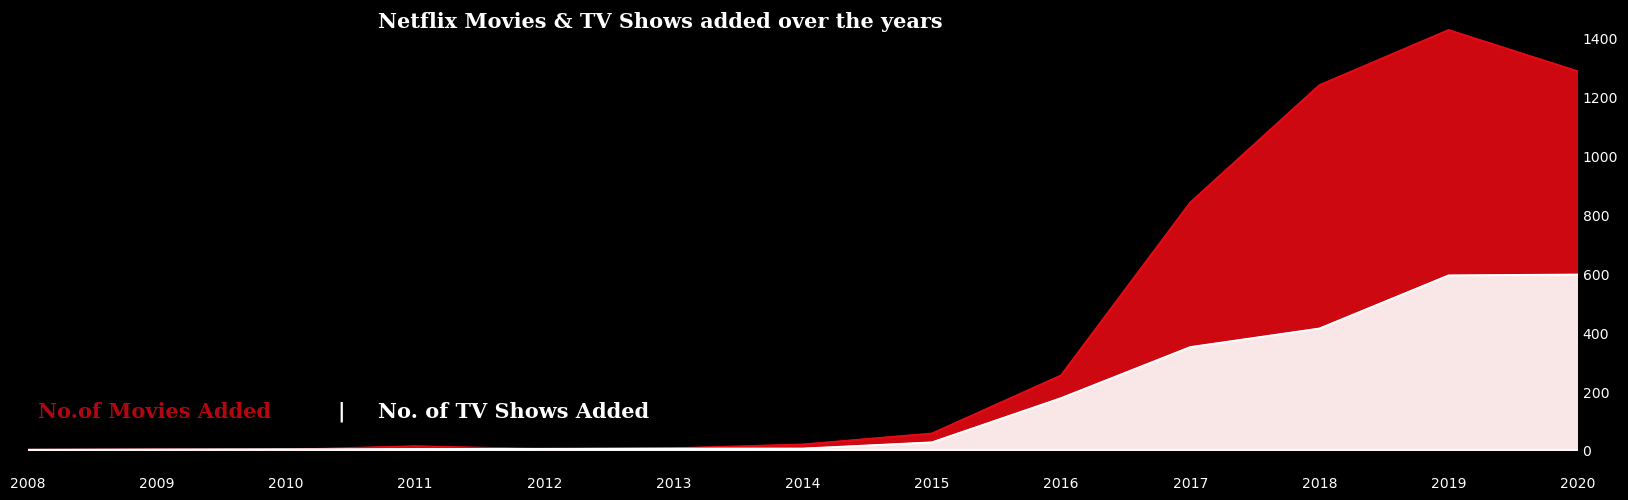

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('dark_background')

# Movies and TV shows added over the years

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
color = ["#E50914", "#ffffff"]

for i, mtv in enumerate(netflix_ds['type'].value_counts().index):
    mtv_rel = netflix_ds[netflix_ds['type']==mtv]['date_added_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'white', linewidth = 1.4, alpha = .9)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.30, 0.85, 'Netflix Movies & TV Shows added over the years', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13,0.2,"No.of Movies Added", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.28,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='white')
fig.text(0.3,0.2,"No. of TV Shows Added", fontweight="bold", fontfamily='serif', fontsize=15, color='#FFFFFF')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**Observations**

We clearly see a sudden increase in the addition of content by Netflix after the year`2016`. Especially with `2019` being the year with most added Movies and `2020` being the year with most amount of TV Shows added.

We also record that the growth in the addition of Movies is much higher than growth in the addition of TV shows post `2016`.

A part of this boom is explained by their new initiative, which was a huge undertaking to expand their services to `130` new countries.

In [ ]:
#Verifying through code the findings to ensure visualizations are correct
netflix_ds[netflix_ds['type'] == 'Movie']['date_added_year'].value_counts().head(1)

2019.0    1424
Name: date_added_year, dtype: int64

In [ ]:
netflix_ds[netflix_ds['type'] == 'TV Show']['date_added_year'].value_counts().head(1)

2020.0    595
Name: date_added_year, dtype: int64


In addition to just the content added, it could be interesting to see the top durations of both Movies and TV Shows addded by Netflix

##**Before and after 2016 content trend**##

In [ ]:
#before 2016
before_2016 = netflix_ds[(netflix_ds.date_added <= '2016')]['title'].count()
before_2016

In [ ]:
#after 2016
after_2016 = netflix_ds[(netflix_ds.date_added > '2016')]['title'].count()
after_2016

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Create dataset
Values = [159, 8550]
bars = ('Before 2016', 'After 2016')
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, Values, color = "#E50914")
 
# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.ylabel("Content Count")
plt.title("Before and After 2016 Content Trend")
 
# Show graphic
plt.show()

# **Phase 2**

## FAANG Trend

In [185]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [186]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# will lead to static images of your plot embedded in the notebook
%matplotlib inline 

In [187]:
!pip install yfinance -q

     |████████████████████████████████| 62 kB 905 kB/s 


In [188]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'GOOGL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
googl = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
googl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,15.689439,15.753504,15.621622,15.684434,78169752,0,0.0
2010-01-05 00:00:00-05:00,15.695195,15.711712,15.554054,15.615365,120067812,0,0.0
2010-01-06 00:00:00-05:00,15.662162,15.662162,15.174174,15.221722,158988852,0,0.0
2010-01-07 00:00:00-05:00,15.250250,15.265265,14.831081,14.867367,256315428,0,0.0
2010-01-08 00:00:00-05:00,14.814815,15.096346,14.742492,15.065566,188783028,0,0.0
...,...,...,...,...,...,...,...
2021-02-01 00:00:00-05:00,92.229500,95.777000,92.229500,94.653503,40252000,0,0.0
2021-02-02 00:00:00-05:00,95.656502,97.468498,95.318497,95.956001,66332000,0,0.0
2021-02-03 00:00:00-05:00,103.280502,105.331001,100.677498,102.944000,97882000,0,0.0


In [189]:
googl_close = googl['Close']

In [ ]:
#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
aapl = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
aapl_close = aapl['Close']

In [ ]:
#define the ticker symbol
tickerSymbol = 'AMZN'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
amzn = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
amzn_close = amzn['Close']

In [ ]:
tickerSymbol = 'META'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
meta = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
meta_close = meta['Close']

In [ ]:
tickerSymbol = 'NFLX'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
nflx = tickerData.history(period='1d', start='2010-1-1', end='2021-2-06')

#see your data
nflx_close = nflx['Close']

##FAANG - Netflix comparison stock price

In [29]:
googl_close.plot()
aapl_close.plot()
amzn_close.plot()
nflx_close.plot()
meta_close.plot()

location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["Google", "Apple", "Amazon","Netflix", "Facebook"], loc=0, frameon=legend_drawn_flag)
plt.ylim([0,600])
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Netflix Market Performance vs Global Leaders")
plt.show()


NameError: ignored

##Netflix trend

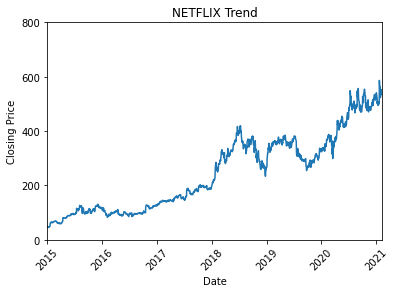

In [ ]:
from datetime import date

ax = plt.axes()
ax.plot(nflx_close)
ax.set(xlim=(date(year=2015, month=1, day=1), date(year=2021, month=2, day=6)), ylim=(0, 800),
       xlabel='Date', ylabel='Closing Price',
       title='NETFLIX Trend')
plt.xticks(rotation=45)
plt.yticks([0, 200, 400, 600, 800]);

# Netflix subscriber growth

In [31]:
import requests as r
from pandas.io.json import json_normalize

action_posturl = "https://atlas.jifo.co/api/connectors/353c6973-eb8f-483a-a56b-598111522757"

res = r.get(action_posturl)
search_cookies = res.cookies

##Webscraping

In [76]:
url = "https://atlas.jifo.co/api/connectors/353c6973-eb8f-483a-a56b-598111522757"
x = r.get(url).json()

In [77]:
x


{'data': [[['Title 1', 'Title 2'],
   ['Launch date',
    '29 August 1997, 15 January 2007 (streaming service launch)'],
   ['HQ', 'Los Gatos, California'],
   ['People',
    'Reed Hastings (co-CEO, founder), Ted Sarandos (co-CEO, chief content officer), Greg Peters (COO, CPO)'],
   ['Business type', 'Public (NASDAQ: NFLX)'],
   ['Industry', 'Video streaming']],
  [['Date', 'Revenue ($mm)'],
   ['Q1 2011', '719'],
   ['Q2 2011', '789'],
   ['Q3 2011', '822'],
   ['Q4 2011', '876'],
   ['Q1 2012', '870'],
   ['Q2 2012', '889'],
   ['Q3 2012', '905'],
   ['Q4 2012', '945'],
   ['Q1 2013', '1024'],
   ['Q2 2013', '1069'],
   ['Q3 2013', '1106'],
   ['Q4 2013', '1175'],
   ['Q1 2014', '1270'],
   ['Q2 2014', '1340'],
   ['Q3 2014', '1409'],
   ['Q4 2014', '1485'],
   ['Q1 2015', '1573'],
   ['Q2 2015', '1645'],
   ['Q3 2015', '1738'],
   ['Q4 2015', '1823'],
   ['Q1 2016', '1958'],
   ['Q2 2016', '2105'],
   ['Q3 2016', '2290'],
   ['Q4 2016', '2478'],
   ['Q1 2017', '2637'],
   ['Q2 2017'

##converting to pd frame

In [34]:
import pandas as pd
new = pd.DataFrame.from_dict(x)
  
new

,data,fileName,sheetNames,version,refreshed
0,"[[Title 1, Title 2], [Launch date, 29 August 1...",Netflix App Data,Overview,46,1669820783000
1,"[[Date, Revenue ($mm)], [Q1 2011, 719], [Q2 20...",Netflix App Data,QRev,46,1669820783000
2,"[[Year, Revenue ($bn)], [2011, 3.1], [2012, 3....",Netflix App Data,ARev,46,1669820783000
3,"[[Year, US & Canada, EMEA, Latin America, Asia...",Netflix App Data,Rev_by_region,46,1669820783000
4,"[[Year, US & Canada, EMEA, Latin America, Asia...",Netflix App Data,ARPU_by_region,46,1669820783000
5,"[[Date, Net Income/Loss ($mm)], [Q1 2009, 22],...",Netflix App Data,QNetInc,46,1669820783000
6,"[[Date, Net Income/Loss ($mm)], [2011, 225], [...",Netflix App Data,ANetInc,46,1669820783000
7,"[[Year, Content spend ($bn)], [2016, 6.88], [2...",Netflix App Data,Content_spend,46,1669820783000
8,"[[Date, Subscribers (mm)], [Q3 2011, 21.5], [Q...",Netflix App Data,QSubs,46,1669820783000
9,"[[Date, Subscribers (mm)], [2011, 21.5], [2012...",Netflix App Data,ASubs,46,1669820783000


In [35]:
new1 = new['data'][8]
new1

[['Date', 'Subscribers (mm)'],
 ['Q3 2011', '21.5'],
 ['Q4 2011', '21.6'],
 ['Q1 2012', '24.43'],
 ['Q2 2012', '25.71'],
 ['Q3 2012', '27.49'],
 ['Q4 2012', '30.36'],
 ['Q1 2013', '34.24'],
 ['Q2 2013', '35.63'],
 ['Q3 2013', '38.01'],
 ['Q4 2013', '41.43'],
 ['Q1 2014', '46.14'],
 ['Q2 2014', '47.99'],
 ['Q3 2014', '50.65'],
 ['Q4 2014', '54.48'],
 ['Q1 2015', '59.62'],
 ['Q2 2015', '62.71'],
 ['Q3 2015', '66.02'],
 ['Q4 2015', '70.84'],
 ['Q1 2016', '77.71'],
 ['Q2 2016', '79.9'],
 ['Q3 2016', '83.28'],
 ['Q4 2016', '89.09'],
 ['Q1 2017', '94.36'],
 ['Q2 2017', '99.04'],
 ['Q3 2017', '104.02'],
 ['Q4 2017', '110.64'],
 ['Q1 2018', '118.9'],
 ['Q2 2018', '124.35'],
 ['Q3 2018', '130.42'],
 ['Q4 2018', '139.26'],
 ['Q1 2019', '148.86'],
 ['Q2 2019', '151.56'],
 ['Q3 2019', '158.33'],
 ['Q4 2019', '167.09'],
 ['Q1 2020', '182.86'],
 ['Q2 2020', '192.95'],
 ['Q3 2020', '195.15'],
 ['Q4 2020', '203.66'],
 ['Q1 2021', '207.64'],
 ['Q2 2021', '209'],
 ['Q3 2021', '214'],
 ['Q4 2021', '222.2

In [36]:
sc1 = pd.DataFrame.from_dict(new1)
sc1

,0,1
0,Date,Subscribers (mm)
1,Q3 2011,21.5
2,Q4 2011,21.6
3,Q1 2012,24.43
4,Q2 2012,25.71
5,Q3 2012,27.49
6,Q4 2012,30.36
7,Q1 2013,34.24
8,Q2 2013,35.63
9,Q3 2013,38.01


In [37]:
sc = sc1.iloc[1: , :]
sc

,0,1
1,Q3 2011,21.5
2,Q4 2011,21.6
3,Q1 2012,24.43
4,Q2 2012,25.71
5,Q3 2012,27.49
6,Q4 2012,30.36
7,Q1 2013,34.24
8,Q2 2013,35.63
9,Q3 2013,38.01
10,Q4 2013,41.43


##assigning column names

In [38]:
sc.columns =['Quarter', 'Subscriber Count']
sc

,Quarter,Subscriber Count
1,Q3 2011,21.5
2,Q4 2011,21.6
3,Q1 2012,24.43
4,Q2 2012,25.71
5,Q3 2012,27.49
6,Q4 2012,30.36
7,Q1 2013,34.24
8,Q2 2013,35.63
9,Q3 2013,38.01
10,Q4 2013,41.43


##converting data type to numeric

In [39]:
sc["Subscriber Count"] = pd.to_numeric(sc["Subscriber Count"], errors='coerce')
sc.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 1 to 45
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quarter           45 non-null     object 
 1   Subscriber Count  45 non-null     float64
dtypes: float64(1), object(1)
memory usage: 852.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
sc['Quarter'].str.decode('utf-8').fillna(sc['Quarter'])

1     Q3 2011
2     Q4 2011
3     Q1 2012
4     Q2 2012
5     Q3 2012
6     Q4 2012
7     Q1 2013
8     Q2 2013
9     Q3 2013
10    Q4 2013
11    Q1 2014
12    Q2 2014
13    Q3 2014
14    Q4 2014
15    Q1 2015
16    Q2 2015
17    Q3 2015
18    Q4 2015
19    Q1 2016
20    Q2 2016
21    Q3 2016
22    Q4 2016
23    Q1 2017
24    Q2 2017
25    Q3 2017
26    Q4 2017
27    Q1 2018
28    Q2 2018
29    Q3 2018
30    Q4 2018
31    Q1 2019
32    Q2 2019
33    Q3 2019
34    Q4 2019
35    Q1 2020
36    Q2 2020
37    Q3 2020
38    Q4 2020
39    Q1 2021
40    Q2 2021
41    Q3 2021
42    Q4 2021
43    Q1 2022
44    Q2 2022
45    Q3 2022
Name: Quarter, dtype: object

In [41]:
sc['Quarter'] = str(sc['Quarter'])
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 1 to 45
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quarter           45 non-null     object 
 1   Subscriber Count  45 non-null     float64
dtypes: float64(1), object(1)
memory usage: 852.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sc['Quarter'] = sc['Quarter'].astype('|S80')
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 1 to 45
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quarter           45 non-null     |S80   
 1   Subscriber Count  45 non-null     float64
dtypes: bytes640(1), float64(1)
memory usage: 4.0 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##splitting quarter column to get year

In [42]:
sc['Quarter']= sc['Quarter'].str.split(" ", n = 1, expand = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


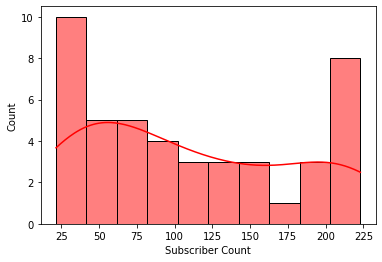

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(sc['Subscriber Count'], kde=True, bins=10, color='r');

##visualisation

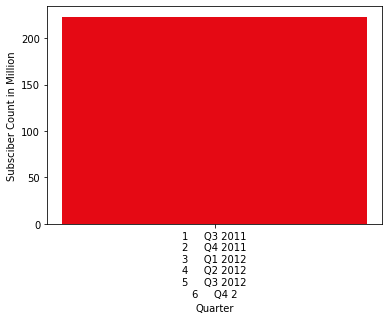

In [ ]:
import matplotlib.pyplot as plt

plt.bar(sc['Quarter'], sc['Subscriber Count'], color ='#E50914')

plt.xlabel('Quarter')
plt.ylabel('Subsciber Count in Million')

plt.show()


#Disney and netflix subscriber count comparison

##hulu sub - sourcedata


In [107]:
huludf = pd.read_csv('/content/Hulu subscriber1.csv')
huludf

,"Number of Hulu's paying subscribers in the U.S. 2019-2022, by quarter",Unnamed: 1
0,Number of Hulu's paying subscribers in the Uni...,NaN
1,NaN,NaN
2,Q4 2010,0.3
3,Q1 2011,0.5
4,Q2 2011,0.9
5,Q3 2011,1.2
6,Q4 2011,1.5
7,Q1 2012,2.0
8,Q2 2012,NaN
9,Q3 2012,NaN


In [102]:
import pandas as pd
huludf = pd.DataFrame.from_dict(y)
  
huludf

,DomainData,CommonData,NtfyConfig,OTTData,MobileData
pclifeSpanYr,Year,NaN,NaN,None,None
pclifeSpanYrs,Years,NaN,NaN,None,None
pclifeSpanSecs,A few seconds,NaN,NaN,None,None
pclifeSpanWk,Week,NaN,NaN,None,None
pclifeSpanWks,Weeks,NaN,NaN,None,None
...,...,...,...,...,...
CSTxt,NaN,NaN,Cookie Settings,None,None
Sync,NaN,NaN,"{'Title': 'Cookie Preferences', 'TitleAlign': ...",None,None
Complete,NaN,NaN,"{'Title': 'Cookie Preferences', 'TitleAlign': ...",None,None
CSButton,NaN,NaN,"{'Color': '#FFFFFF', 'BgColor': '#1276CE', 'Bd...",None,None


In [78]:
new2 = new['data'][11]
new2

[['Date', 'Netflix', 'Disney Plus'],
 ['Q4 2019', '167', '27'],
 ['Q1 2020', '183', '34'],
 ['Q2 2020', '193', '58'],
 ['Q3 2020', '195', '73'],
 ['Q4 2020', '204', '95'],
 ['Q1 2021', '208', '104'],
 ['Q2 2021', '209', '116'],
 ['Q3 2021', '214', '118'],
 ['Q4 2021', '222.2', '129.8'],
 ['Q1 2022', '222', '137.7'],
 ['Q2 2022', '220.6', '152.1'],
 ['Q3 2022', '223', '']]

In [79]:
dn = pd.DataFrame.from_dict(new2)
dn

,0,1,2
0,Date,Netflix,Disney Plus
1,Q4 2019,167,27
2,Q1 2020,183,34
3,Q2 2020,193,58
4,Q3 2020,195,73
5,Q4 2020,204,95
6,Q1 2021,208,104
7,Q2 2021,209,116
8,Q3 2021,214,118
9,Q4 2021,222.2,129.8


In [80]:
dn = dn.iloc[1: , :]
dn

,0,1,2
1,Q4 2019,167,27
2,Q1 2020,183,34
3,Q2 2020,193,58
4,Q3 2020,195,73
5,Q4 2020,204,95
6,Q1 2021,208,104
7,Q2 2021,209,116
8,Q3 2021,214,118
9,Q4 2021,222.2,129.8
10,Q1 2022,222,137.7


In [81]:
dn.columns = ['Quarter', "Netflix subs.count", "Disney subs.count"]
dn

,Quarter,Netflix subs.count,Disney subs.count
1,Q4 2019,167,27
2,Q1 2020,183,34
3,Q2 2020,193,58
4,Q3 2020,195,73
5,Q4 2020,204,95
6,Q1 2021,208,104
7,Q2 2021,209,116
8,Q3 2021,214,118
9,Q4 2021,222.2,129.8
10,Q1 2022,222,137.7


In [50]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Quarter             12 non-null     object
 1   Netflix subs.count  12 non-null     object
 2   Disney subs.count   12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes


In [82]:
dn["Netflix subs.count"] = pd.to_numeric(dn["Netflix subs.count"], errors='coerce')
dn["Disney subs.count"] = pd.to_numeric(dn["Disney subs.count"], errors='coerce')
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quarter             12 non-null     object 
 1   Netflix subs.count  12 non-null     float64
 2   Disney subs.count   11 non-null     float64
dtypes: float64(2), object(1)
memory usage: 420.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
net_sub = dn['Netflix subs.count']
dis_sub = dn['Disney subs.count']

##visual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Subscriber growth of Netflix Vs Disney')

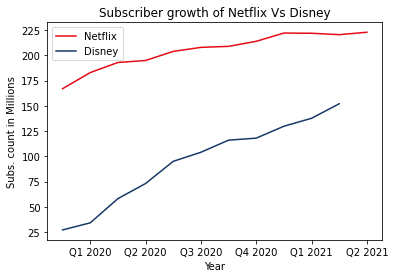

In [98]:
import matplotlib.pyplot as plt
import numpy as np

net_sub.plot(color= '#E50914')
dis_sub.plot(color= '#153866')


legend_drawn_flag = True
plt.legend(["Netflix", "Disney"], loc = 0, frameon = legend_drawn_flag)

ax =plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year")

years = ['Q4 2019', 'Q1 2020', 'Q2 2020', 'Q3 2020', 'Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022', 'Q2 2022', 'Q3 2022']
ax.set_xticklabels(years)

plt.ylabel("Subs. count in Millions")
plt.title("Subscriber growth of Netflix Vs Disney")

## Bokeh plotting 

In [89]:
from bokeh.plotting import figure, output_file, show 

fig = figure(x_axis_label="Season", y_axis_label="Performance")

fig.line(x= "Quarter", y="Netflix subs.count", source=dn, alpha = 0.5, line_color = "green", line_width = 2, legend_label="Steph Curry Points")

fig.line(x="Quarter", y="Disney subs.count", source= dn, line_color = "red", line_width = 1, alpha = 0.8,  legend_label="Chris Paul Points")

output_file( filename="custom_filename.html")

show(fig)

In [100]:
y

{'DomainData': {'pclifeSpanYr': 'Year',
  'pclifeSpanYrs': 'Years',
  'pclifeSpanSecs': 'A few seconds',
  'pclifeSpanWk': 'Week',
  'pclifeSpanWks': 'Weeks',
  'pccloseButtonType': 'Icon',
  'pccontinueWithoutAcceptText': 'Continue without Accepting',
  'cctId': 'acb8c41d-343d-47fb-b0bc-ac829c6b6853',
  'MainText': 'Cookie Consent Manager',
  'MainInfoText': 'When you visit any website, it may store or retrieve information on your browser, mostly in the form of cookies. This information might be about you, your preferences or your device and is mostly used to make the site work as you expect it to. The information does not usually directly identify you, but it can give you a more personalized web experience. Because we respect your right to privacy, you can choose not to allow some types of cookies. Click on the different category headings to find out more and change our default settings. However, blocking some types of cookies may impact your experience of the site and the services w

# revenue of disney, hulu and netflix


In [2]:
import pandas as pd 
disney_r = pd.read_csv("/content/disney plus - revenue.csv")
hulu_r = pd.read_csv("/content/hulu - Revenue.csv")
netflix_r = pd.read_csv("/content/netflix-Revenue.csv")

In [199]:
hulu_r.head()

,Year,Revenue
0,2010,0.2
1,2011,0.4
2,2012,0.6
3,2013,1.0
4,2014,1.1


In [8]:
netflix_r.head()

,Year,Revenue
0,2011,3.1
1,2012,3.5
2,2013,4.3
3,2014,5.4
4,2015,6.7


In [4]:
disney_r.head()

,Year,Revenue
0,Q1 2020,0.442
1,Q2 2020,0.565
2,Q3 2020,0.796
3,Q4 2020,0.999
4,Q1 2021,1.110


In [3]:
disney_r = disney_r.astype({'Year': 'string'})
disney_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     7 non-null      string 
 1   Revenue  7 non-null      float64
dtypes: float64(1), string(1)
memory usage: 240.0 bytes


In [20]:
disney_r

,Year,Revenue
0,Q1 2020,0.442
1,Q2 2020,0.565
2,Q3 2020,0.796
3,Q4 2020,0.999
4,Q1 2021,1.110
5,Q2 2021,1.240
6,Q3 2021,1.440


In [4]:
#disney_r['Year'], disney_r['quarter'] = disney_r['Year'].str.split("  ", 1, expand = True)
disney_r = pd.DataFrame(disney_r.Year.str.split(' ',1).tolist(),
                                 columns = ['Year', 'quarter'])

In [5]:
disney_r

,Year,quarter
0,Q1,2020
1,Q2,2020
2,Q3,2020
3,Q4,2020
4,Q1,2021
5,Q2,2021
6,Q3,2021


In [6]:
disney_r['Year']= disney_r['Year'].str.split("  ", 1, expand = True)
disney_r

,Year,quarter
0,Q1,2020
1,Q2,2020
2,Q3,2020
3,Q4,2020
4,Q1,2021
5,Q2,2021
6,Q3,2021


In [12]:
hey = disney_r["Year"].str.split("  ", n = 1, expand = True)
 
# making separate first name column from new data frame
disney_r["Quarter"]= hey[0]
 
# making separate last name column from new data frame
disney_r["Last Name"]= hey[1]
 
# Dropping old Name columns
disney_r.drop(columns =["Year"], inplace = True)
 
# df display
disney_r

KeyError: ignored

In [180]:
hulu_r.head()

,Year,Revenue
0,2010,0.2
1,2011,0.4
2,2012,0.6
3,2013,1.0
4,2014,1.1


In [7]:
hulu_r = hulu_r.iloc[1: , :]
hulu_r

,Year,Revenue
1,2011,0.4
2,2012,0.6
3,2013,1.0
4,2014,1.1
5,2015,1.6
6,2016,2.0
7,2017,2.4
8,2018,3.1
9,2019,3.5
10,2020,4.4


In [8]:
netflix_r

,Year,Revenue
0,2011,3.1
1,2012,3.5
2,2013,4.3
3,2014,5.4
4,2015,6.7
5,2016,8.8
6,2017,11.6
7,2018,15.7
8,2019,20.1
9,2020,24.9


In [9]:
hulu1 = hulu_r["Revenue"]
net1 = netflix_r["Revenue"]


##Visualisation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Revenue growth of Netflix Vs Hulu')

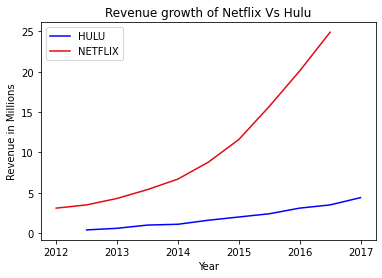

In [27]:
import matplotlib.pyplot as plt
import numpy as np

hulu1.plot(color='blue', label='Premiere')
net1.plot(color='#E50914', label='Premiere')


legend_drawn_flag = True
plt.legend(["HULU", "NETFLIX"], loc = 0, frameon = legend_drawn_flag)

ax =plt.axes()
ax.set_facecolor("white")
plt.xlabel("Year")

years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
ax.set_xticklabels(years)

plt.ylabel("Revenue in Millions")
plt.title("Revenue growth of Netflix Vs Hulu")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Revenue growth of Netflix Vs Hulu')

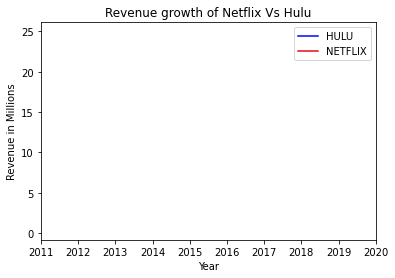

In [25]:
import matplotlib.pyplot as plt
import numpy as np

hulu1.plot(color='blue')
net1.plot(color='#E50914')
legend_drawn_flag = True
plt.legend(["HULU", "NETFLIX"], loc = 0, frameon = legend_drawn_flag)
ax =plt.axes()
ax.set_facecolor("white")

#years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
#ax.set_xticklabels(years)

plt.xlim([2011,2020])
plt.xlabel("Year")
plt.ylabel("Revenue in Millions")
plt.title("Revenue growth of Netflix Vs Hulu")


In [ ]:
my_xticks = ['John','Arnold','Mavis','Matt']
plt.xticks(x, my_xticks)

In [136]:
hulu_r.columns =['h_year', 'h_rev']
netflix_r.columns = ["n_year", "n_rev"]

In [140]:
result = pd.concat([hulu_r, netflix_r], axis=1)
result

,h_year,h_rev,n_year,n_rev
0,2010,0.2,2011.0,3.1
1,2011,0.4,2012.0,3.5
2,2012,0.6,2013.0,4.3
3,2013,1.0,2014.0,5.4
4,2014,1.1,2015.0,6.7
5,2015,1.6,2016.0,8.8
6,2016,2.0,2017.0,11.6
7,2017,2.4,2018.0,15.7
8,2018,3.1,2019.0,20.1
9,2019,3.5,2020.0,24.9


In [147]:
result["n_year"][10] = 2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
lst = []
for each in result["n_year"]:
    lst.append(str(each).split('.')[0])
  
# all values converting to integer data type
result["n_year"] = [int(i) for i in lst]
print(result["n_year"])

0     2011
1     2012
2     2013
3     2014
4     2015
5     2016
6     2017
7     2018
8     2019
9     2020
10    2020
Name: n_year, dtype: int64


In [150]:
result

,h_year,h_rev,n_year,n_rev
0,2010,0.2,2011,3.1
1,2011,0.4,2012,3.5
2,2012,0.6,2013,4.3
3,2013,1.0,2014,5.4
4,2014,1.1,2015,6.7
5,2015,1.6,2016,8.8
6,2016,2.0,2017,11.6
7,2017,2.4,2018,15.7
8,2018,3.1,2019,20.1
9,2019,3.5,2020,24.9


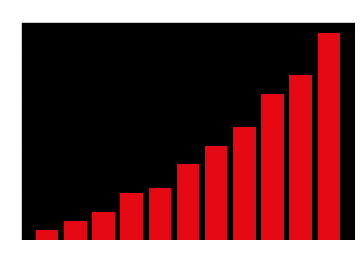

In [151]:
# hulu revenue
import matplotlib.pyplot as plt
plt.bar(result['h_year'], result['h_rev'], color ='#E50914')
plt.title('Yearly Movie Release Count')
plt.show()


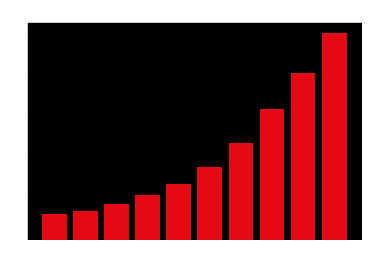

In [152]:
# netflix revenue
import matplotlib.pyplot as plt
plt.bar(result['n_year'], result['n_rev'], color ='#E50914')
plt.title('Yearly Movie Release Count')
plt.show()


# **<span id="Conclusion" style="color:#023e8a;">Conclusion</span>**

Netflix clearly had a big shift in `2016` with their expansion to over `130` countries. In this project, we analyzed multiple datasets to understand Netflix's shift in content-adding practicies w.r.t genres, durations, type and compared it to its competitors such as Disney+, Hulu etc. , which will be shared in the upcoming main project submission.

# **<span id="References" style="color:#023e8a;">References</span>**

References


*  https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
* https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
* https://www.holisticseo.digital/python-seo/word-cloud/
*  https://www.dataquest.io/blog/making-538-plots/
*  https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
*  https://www.kaggle.com/general/51898
*  https://www.imdb.com/
* https://www.kaggle.com/code/joshuaswords/netflix-data-visualization


